<a href="https://colab.research.google.com/github/minhDtran/ClaeningData/blob/master/GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generating a fake dataset
np.random.seed(42)

# Create 1000 samples with random values for bedrooms and square footage
bedrooms = np.random.randint(1, 6, 1000)  # 1 to 5 bedrooms
square_feet = np.random.randint(500, 5000, 1000)  # square feet between 500 to 5000

# Simulating house prices (linear relationship with some noise)
price = (square_feet * 150) + (bedrooms * 5000) + np.random.normal(0, 10000, 1000)  # Price = square_feet*150 + bedrooms*5000 + noise

# Create a DataFrame
df = pd.DataFrame({'bedrooms': bedrooms, 'square_feet': square_feet, 'price': price})

# Show the first few rows
df.head()


,bedrooms,square_feet,price
0,4,4031,620308.898205
1,5,4951,762212.205668
2,3,3435,531123.149740
3,5,4376,686866.916058
4,5,626,120132.302729


In [2]:
# Split the data into features (X) and target (y)
X = df[['bedrooms', 'square_feet']]
y = df['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Best hyperparameters found: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10}
Mean Squared Error on Test Set: 114884175.41557735


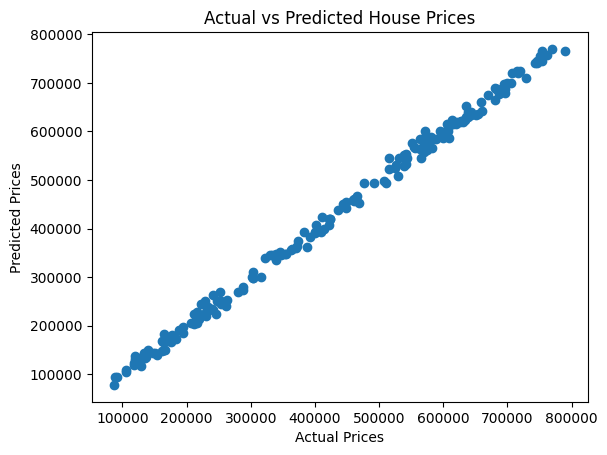

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create a Gradient Boosting Regressor model
gbm = GradientBoostingRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],               # Depth of the trees
    'learning_rate': [0.01, 0.05, 0.1],   # Learning rate
    'min_samples_split': [2, 5, 10]       # Minimum samples required to split an internal node
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
print(f"Best hyperparameters found: {grid_search.best_params_}")

# Get the best model
best_gbm = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_gbm.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Optionally, plot predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Sample param_grid
param_grid = {
    'max_depth': [3, 4, 5],              # Depth of the trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'min_samples_split': [2, 5, 10]      # Minimum samples required to split an internal node
}

# Assuming X_train, X_test, y_train, y_test are already defined
# Let's set up the GridSearchCV with GradientBoostingRegressor
model = GradientBoostingRegressor()

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Now, we want to print out all combinations of hyperparameters, and their actual, predicted values, MSE, and RMSE

# Get all the parameter values from the GridSearchCV results
param_combinations = grid_search.cv_results_['params']

# Create a DataFrame to store all the results
all_results = []

# Iterate over all the parameter combinations and evaluate each one
for params in param_combinations:
    # Get the hyperparameters for the current combination
    max_depth = params['max_depth']
    learning_rate = params['learning_rate']
    min_samples_split = params['min_samples_split']

    # Train the model with the current hyperparameters
    model = GradientBoostingRegressor(max_depth=max_depth,
                                      learning_rate=learning_rate,
                                      min_samples_split=min_samples_split)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate MSE and RMSE for each prediction
    mse_per_prediction = (y_test - y_pred) ** 2
    rmse_per_prediction = np.sqrt(mse_per_prediction)

    # Store the results in a list
    for i in range(len(y_test)):
        all_results.append({
            'max_depth': max_depth,
            'learning_rate': learning_rate,
            'min_samples_split': min_samples_split,
            'Actual Price': y_test.iloc[i],
            'Predicted Price': y_pred[i],
            'MSE': mse_per_prediction.iloc[i],
            'RMSE': rmse_per_prediction.iloc[i]
        })

# Create a DataFrame from all the results
results_df = pd.DataFrame(all_results)

# Print the first few rows of the results
print(results_df.head())

# Optionally, print the best hyperparameters used in the best model
print("\nBest Hyperparameters used in the model:")
print(f"Max Depth: {grid_search.best_params_['max_depth']}")
print(f"Learning Rate: {grid_search.best_params_['learning_rate']}")
print(f"Min Samples Split: {grid_search.best_params_['min_samples_split']}")

# Optionally, print RMSE of the entire test set for overall evaluation
overall_mse = mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test))
overall_rmse = np.sqrt(overall_mse)
print("\nOverall Test Set Performance:")
print(f"Overall MSE: {overall_mse}")
print(f"Overall RMSE: {overall_rmse}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
   max_depth  learning_rate  min_samples_split   Actual Price  \
0          3           0.01                  2  176028.831061   
1          3           0.01                  2  761209.480732   
2          3           0.01                  2  106276.493354   
3          3           0.01                  2  345833.487086   
4          3           0.01                  2  636012.620086   

   Predicted Price           MSE           RMSE  
0    269161.564035  8.673706e+09   93132.732973  
1    625947.576455  1.829578e+10  135261.904277  
2    236426.795063  1.693910e+10  130150.301709  
3    375289.493171  8.676563e+08   29456.006085  
4    572801.439612  3.995653e+09   63211.180474  

Best Hyperparameters used in the model:
Max Depth: 3
Learning Rate: 0.1
Min Samples Split: 2

Overall Test Set Performance:
Overall MSE: 113798218.98779735
Overall RMSE: 10667.62480535369
